In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('C:/Users/Santiago/Downloads/datasets/auto.csv', index_col=0)
pd.options.display.max_columns = None
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [15]:
df.shape

(201, 29)

In [3]:
values = {"stroke" : 3.29 }
df.fillna(value=values, inplace=True)

In [4]:
values = {"horsepower-binned" : "High" }
df.fillna(value=values, inplace=True)

In [5]:
missing_values_count  = df.isna().sum()
missing_values_count

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [7]:
np.corrcoef(df['price'], df['horsepower'])

array([[1.        , 0.80957457],
       [0.80957457, 1.        ]])

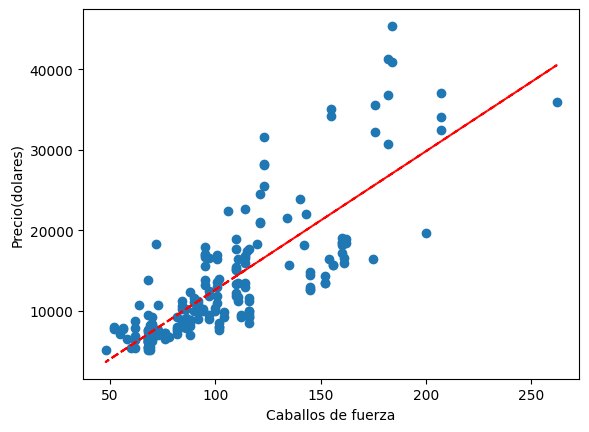

In [5]:
x = (df['horsepower']) 
y = (df['price'])
plt.scatter(x, y)
plt.xlabel("Caballos de fuerza")
plt.ylabel("Precio(dolares)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

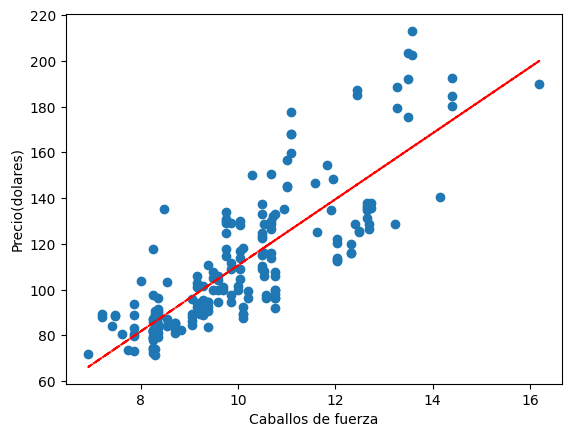

In [6]:
x = np.sqrt(df['horsepower']) 
y = np.sqrt(df['price'])
plt.scatter(x, y)
plt.xlabel("Caballos de fuerza")
plt.ylabel("Precio(dolares)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

## Regresion lineal simple

In [6]:
r = ols('price ~ horsepower', data=df).fit()
r.params


Intercept    -4597.558298
horsepower     172.183122
dtype: float64

In [10]:
print(r.fittedvalues)

0      14514.768234
1      14514.768234
2      21918.642477
3      12965.120137
4      15203.500722
           ...     
196    15031.317600
197    22951.741208
198    18474.980038
199    13653.852625
200    15031.317600
Length: 201, dtype: float64


In [16]:
print(r.resid)

0     -1019.768234
1      1985.231766
2     -5418.642477
3       984.879863
4      2246.499278
          ...     
196    1813.682400
197   -3906.741208
198    3010.019962
199    8816.147375
200    7593.682400
Length: 201, dtype: float64


In [18]:
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     378.5
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           6.37e-48
Time:                        14:30:16   Log-Likelihood:                -1982.7
No. Observations:                 201   AIC:                             3969.
Df Residuals:                     199   BIC:                             3976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4597.5583    972.807     -4.726      0.0

In [11]:
predictions = pd.DataFrame({'horsepower': np.arange(50, 301, 50)})

In [12]:
explanatory = pd.DataFrame({'horsepower': np.arange(50, 301, 50)})
pred= r.predict(explanatory)

0     4011.597798
1    12620.753893
2    21229.909989
3    29839.066085
4    38448.222180
5    47057.378276
dtype: float64

In [13]:
prediction_data= explanatory.assign(predictions = pred)
prediction_data

,horsepower,predictions
0,50,4011.597798
1,100,12620.753893
2,150,21229.909989
3,200,29839.066085
4,250,38448.222180
5,300,47057.378276


<AxesSubplot: xlabel='horsepower', ylabel='price'>

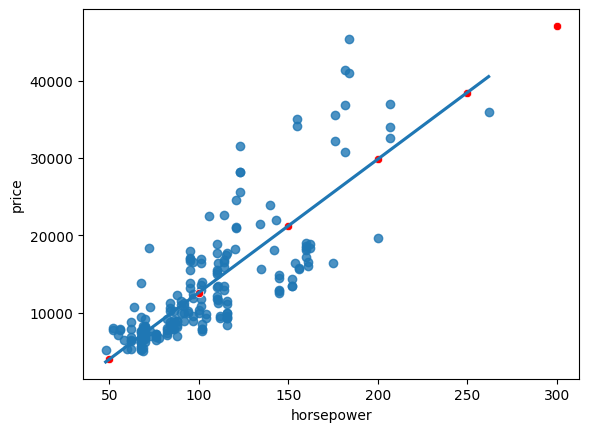

In [14]:
fig = plt.figure()

sns.regplot(x="horsepower",
            y="price",
            data=df,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x='horsepower',
            y='predictions',
            data=prediction_data,
            color='red')


In [8]:
mse = r.mse_resid
rse = np.sqrt(mse)
print(rse)

4676.770040348043
